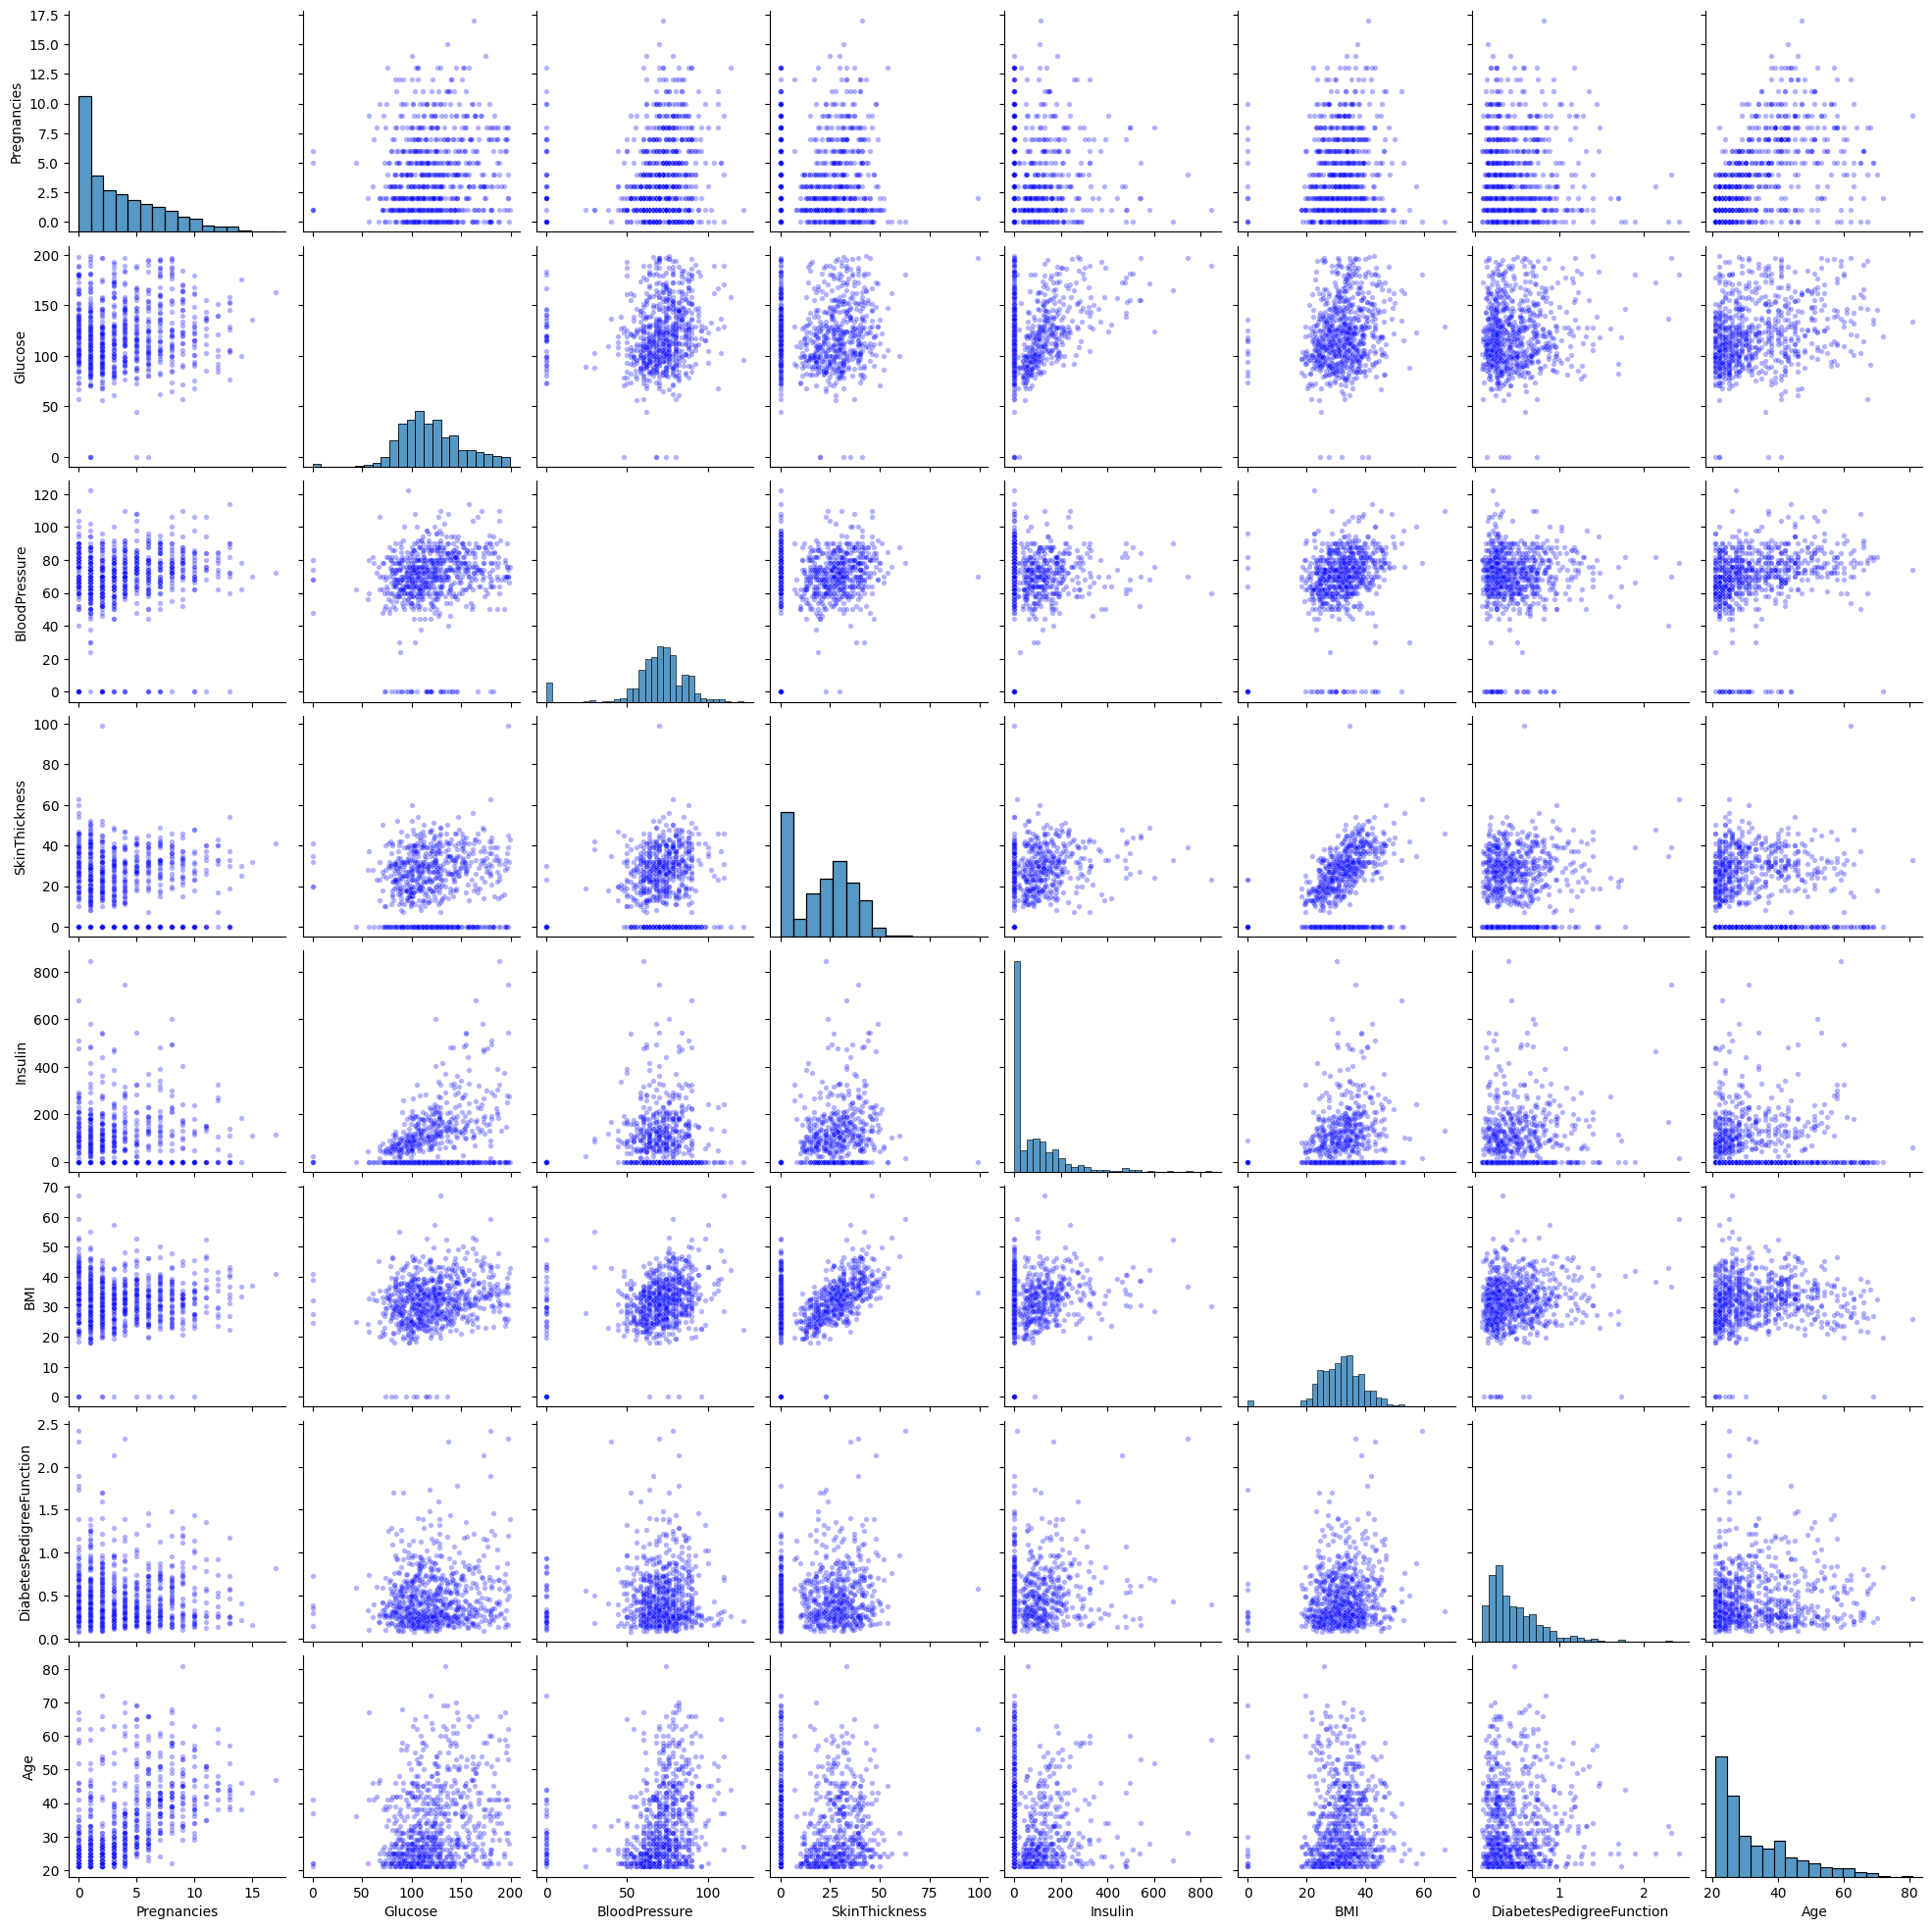

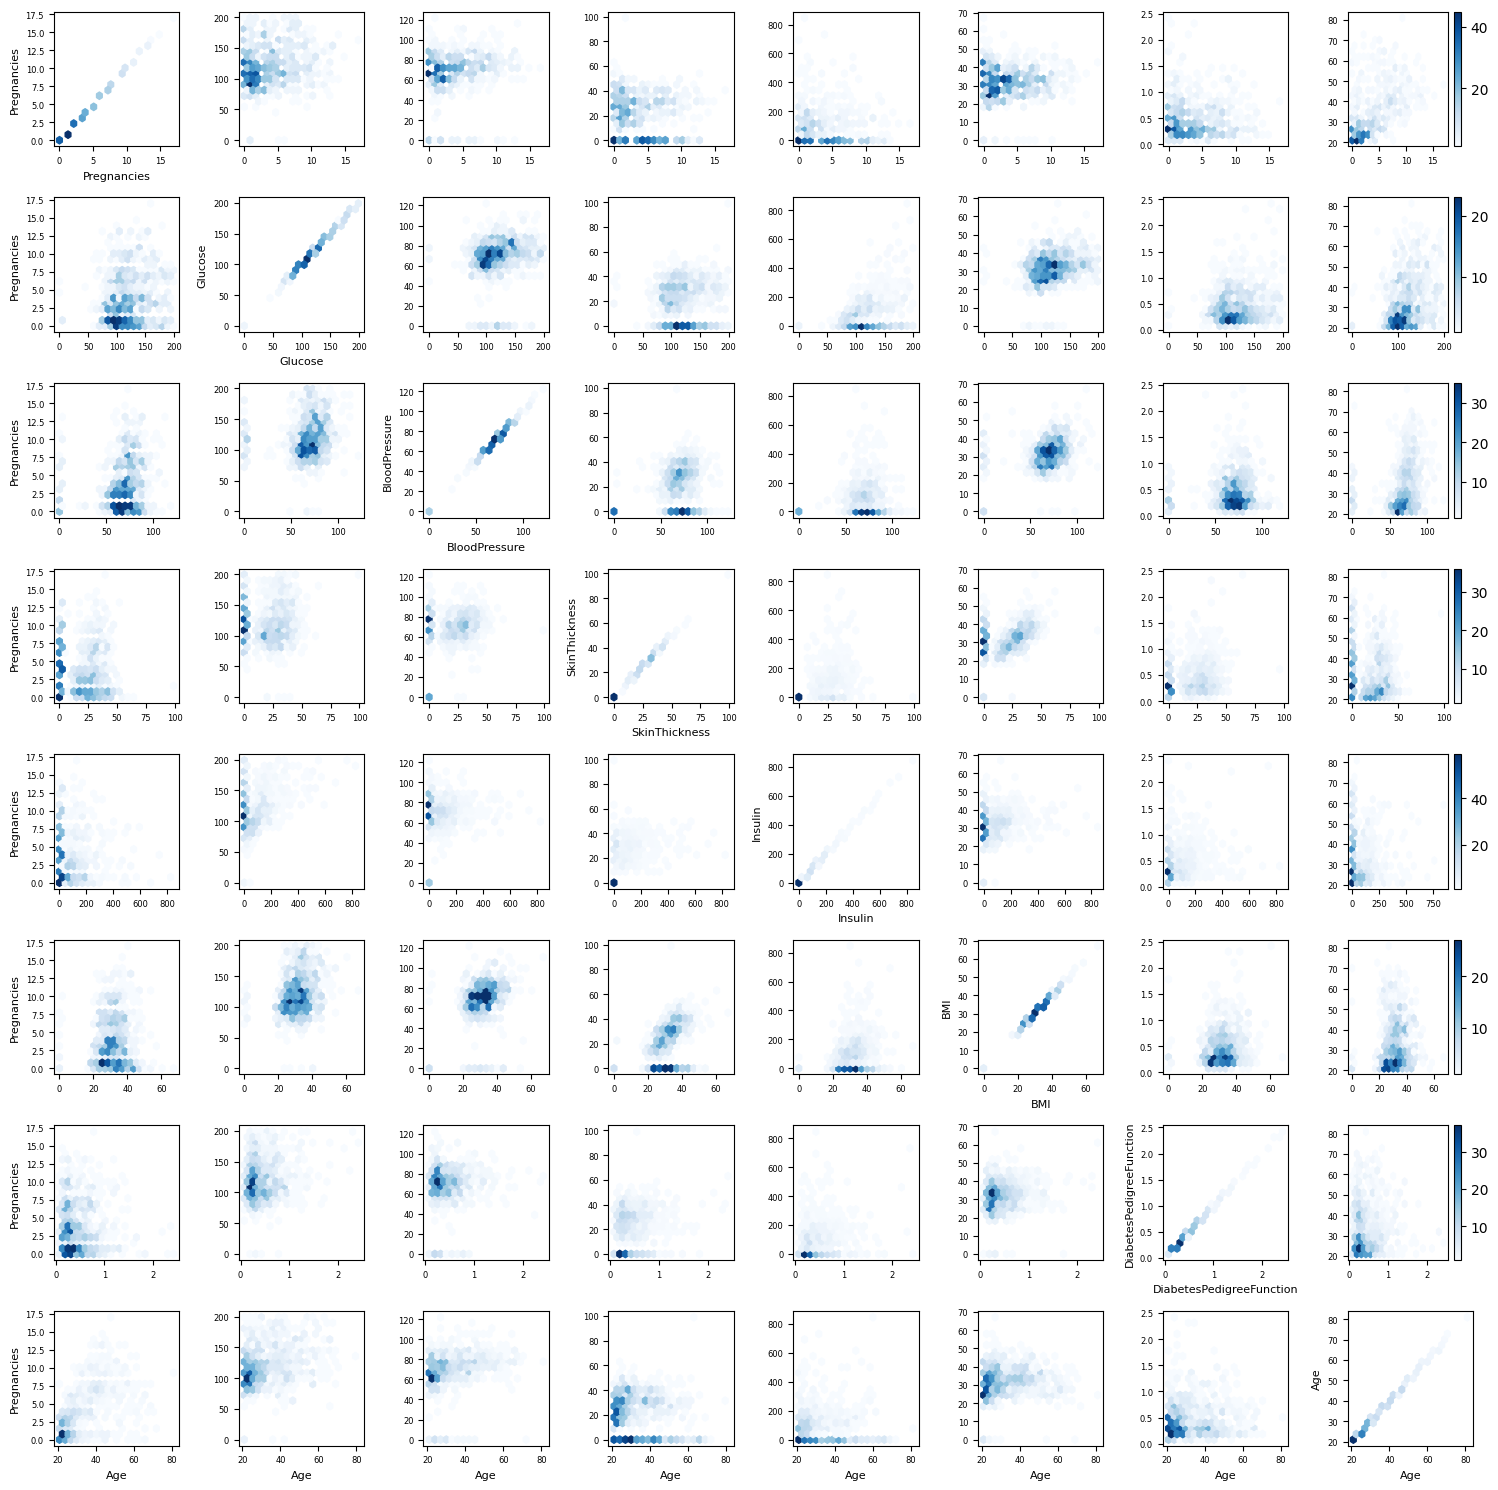

<Figure size 640x480 with 0 Axes>

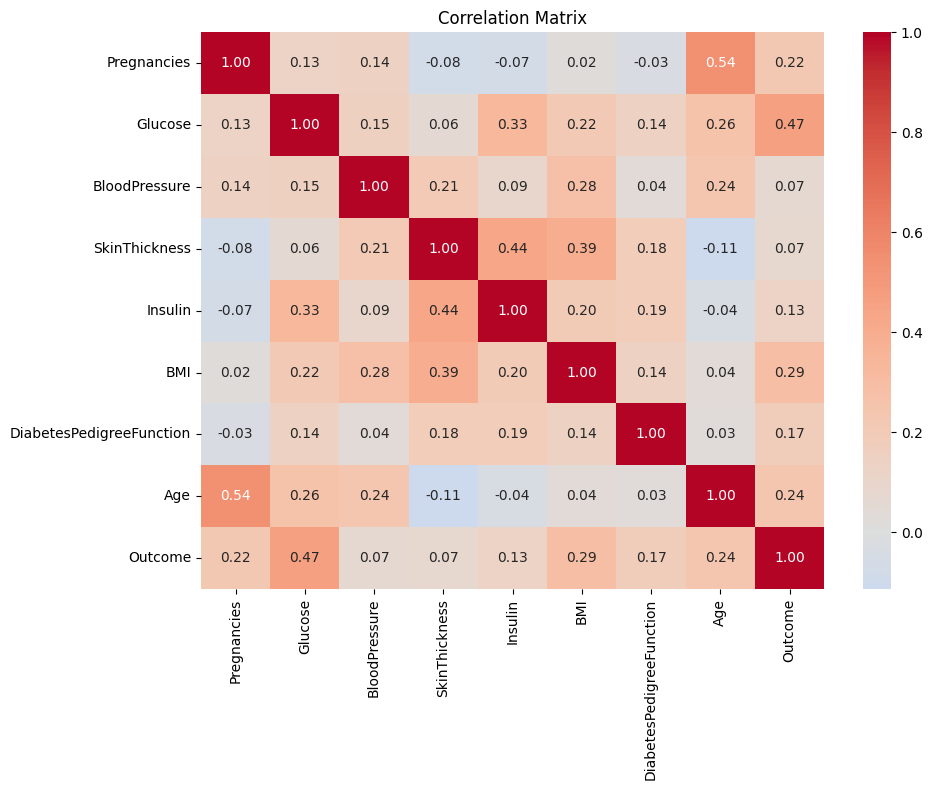

Custom F1: 0.5263
Sklearn F1: 0.6122


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('diabetes.csv').drop_duplicates()

sns.pairplot(data.drop('Outcome', axis=1), 
             plot_kws={'alpha':0.3, 'color':'blue', 's':15})
plt.show()

features = data.columns.drop('Outcome')
n = len(features)

fig, axs = plt.subplots(n, n, figsize=(15, 15))

for i in range(n):
    for j in range(n):
        if i == j:
            hb = axs[i,j].hexbin(data[features[i]], data[features[i]], 
                               gridsize=20, cmap='Blues', mincnt=1)
            axs[i,j].set_xlabel(features[i], fontsize=8)
            axs[i,j].set_ylabel(features[i], fontsize=8)
        else:
            hb = axs[i,j].hexbin(data[features[i]], data[features[j]], 
                               gridsize=20, cmap='Blues', mincnt=1)
            if j == n-1:
                plt.colorbar(hb, ax=axs[i,j])
        
        if i == n-1:
            axs[i,j].set_xlabel(features[i], fontsize=8)
        if j == 0 and i != j:
            axs[i,j].set_ylabel(features[j], fontsize=8)
        
        axs[i,j].tick_params(labelsize=6)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

class LogisticReg:
    def __init__(self, lr=0.01, n_iter=1000, tol=1e-4):
        self.lr = lr
        self.n_iter = n_iter
        self.tol = tol
        self.w = None
        self.b = None
    
    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iter):
            z = np.dot(X, self.w) + self.b
            p = self._sigmoid(z)
            
            dw = (1/n_samples) * np.dot(X.T, (p-y))
            db = (1/n_samples) * np.sum(p-y)
            
            w_prev = self.w.copy()
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            if np.linalg.norm(self.w-w_prev) < self.tol:
                break
    
    def predict(self, X, t=0.5):
        return self._sigmoid(np.dot(X, self.w)+self.b) >= t

X_train, X_test, y_train, y_test = train_test_split(
    data[['Glucose']], data['Outcome'], test_size=0.2, random_state=42)

custom_model = LogisticReg(lr=0.001, n_iter=10000)
custom_model.fit(X_train.values, y_train.values)
sklearn_model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

print(f"Custom F1: {f1_score(y_test, custom_model.predict(X_test.values)):.4f}")
print(f"Sklearn F1: {f1_score(y_test, sklearn_model.predict(X_test)):.4f}")